In [1]:
import pandas as pd
import numpy as np
import warnings
from environments.utils import create_data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

In [23]:
sp500_df,_ = create_data(scale_to_std=True, scale_min_max=False)

In [24]:
sp500_df

,open,high,low,close,volume,ADL,ADX,AO,ATR,BBWIDTH,...,WILLIAMS,WMA,WOBV,ZLEMA,sin_weekday,cos_weekday,sin_monthday,cos_monthday,sin_yearday,cos_yearday
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,-0.818736,-0.823184,-0.823755,-0.837026,-1.793796,-1.365816,8.029711,0.236997,-0.706685,-0.638688,...,-1.989637,-0.866934,0.161687,-0.932002,0.000000,1.000000,5.712682e-01,0.820763,5.161967e-02,0.998667
2005-01-04,-0.836500,-0.844749,-0.850749,-0.862352,-1.621422,-1.368466,8.029711,0.236997,-0.706685,-0.638688,...,-1.989637,-0.866934,0.161687,-0.932002,0.781831,0.623490,7.247928e-01,0.688967,6.880243e-02,0.997630
2005-01-05,-0.861828,-0.868388,-0.853768,-0.870133,-1.606743,-1.372068,8.029711,0.236997,-0.706685,-0.638688,...,-1.989637,-0.866934,0.155722,-0.932002,0.974928,-0.222521,8.486443e-01,0.528964,8.596480e-02,0.996298
2005-01-06,-0.869608,-0.870371,-0.854582,-0.862641,-1.745987,-1.371725,8.029711,0.236997,-0.706685,-0.638688,...,-1.989637,-0.866934,0.160904,-0.932002,0.433884,-0.900969,9.377521e-01,0.347305,1.031017e-01,0.994671
2005-01-07,-0.862117,-0.869344,-0.856589,-0.865710,-1.820775,-1.372331,8.029711,0.236997,-0.706685,-0.638688,...,-1.989637,-0.866934,0.158905,-0.932002,-0.433884,-0.900969,9.884683e-01,0.151428,1.202080e-01,0.992749
2005-01-10,-0.865186,-0.864691,-0.851816,-0.858381,-1.810525,-1.372045,8.029711,0.236997,-0.706685,-0.638688,...,-1.989637,-0.866934,0.163721,-0.932002,0.000000,1.000000,8.978045e-01,-0.440394,1.712931e-01,0.985220
2005-01-11,-0.857856,-0.872860,-0.859717,-0.871487,-1.811837,-1.373528,8.029711,0.236997,-0.706685,-0.638688,...,-1.989637,-0.866934,0.155118,-0.932002,0.781831,0.623490,7.907757e-01,-0.612106,1.882267e-01,0.982126
2005-01-12,-0.870962,-0.877061,-0.868377,-0.862984,-1.751727,-1.370394,8.029711,0.236997,-0.706685,-0.638688,...,-1.989637,-0.866934,0.160974,-0.932002,0.974928,-0.222521,6.513725e-01,-0.758758,2.051045e-01,0.978740
2005-01-13,-0.862460,-0.877458,-0.868070,-0.881488,-1.794206,-1.372670,8.029711,0.236997,-0.706685,-0.638688,...,-1.989637,-0.866934,0.148653,-0.932002,0.433884,-0.900969,4.853020e-01,-0.874347,2.219215e-01,0.975065


In [25]:
arr = []
for col in range(len(sp500_df.columns)):
    pca = decomposition.PCA(n_components=col+1)
    pc = pca.fit_transform(sp500_df)
    arr.append(pca.explained_variance_ratio_.sum())

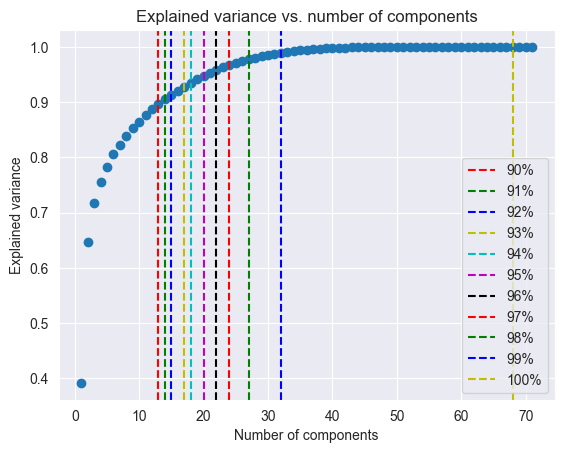

90% variance explained by 13 components
91% variance explained by 14 components
92% variance explained by 15 components
93% variance explained by 17 components
94% variance explained by 18 components
95% variance explained by 20 components
96% variance explained by 22 components
97% variance explained by 24 components
98% variance explained by 27 components
99% variance explained by 32 components
100% variance explained by 68 components


In [26]:
# plot arr and see how many components we need to explain 90%, 91%, 92%, etc. of the variance
var_90 = np.where(np.array(arr) >= 0.9)[0][0]
var_91 = np.where(np.array(arr) >= 0.91)[0][0]
var_92 = np.where(np.array(arr) >= 0.92)[0][0]
var_93 = np.where(np.array(arr) >= 0.93)[0][0]
var_94 = np.where(np.array(arr) >= 0.94)[0][0]
var_95 = np.where(np.array(arr) >= 0.95)[0][0]
var_96 = np.where(np.array(arr) >= 0.96)[0][0]
var_97 = np.where(np.array(arr) >= 0.97)[0][0]
var_98 = np.where(np.array(arr) >= 0.98)[0][0]
var_99 = np.where(np.array(arr) >= 0.99)[0][0]
var_100 = np.where(np.array(arr) >= 1.0)[0][0]
plt.scatter(range(1, len(sp500_df.columns)+1), arr)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Explained variance vs. number of components')
plt.axvline(x=var_90, color='r', linestyle='--', label='90%')
plt.axvline(x=var_91, color='g', linestyle='--', label='91%')
plt.axvline(x=var_92, color='b', linestyle='--', label='92%')
plt.axvline(x=var_93, color='y', linestyle='--', label='93%')
plt.axvline(x=var_94, color='c', linestyle='--', label='94%')
plt.axvline(x=var_95, color='m', linestyle='--', label='95%')
plt.axvline(x=var_96, color='k', linestyle='--', label='96%')
plt.axvline(x=var_97, color='r', linestyle='--', label='97%')
plt.axvline(x=var_98, color='g', linestyle='--', label='98%')
plt.axvline(x=var_99, color='b', linestyle='--', label='99%')
plt.axvline(x=var_100, color='y', linestyle='--', label='100%')
plt.legend()
plt.show()
print('90% variance explained by {} components'.format(var_90))
print('91% variance explained by {} components'.format(var_91))
print('92% variance explained by {} components'.format(var_92))
print('93% variance explained by {} components'.format(var_93))
print('94% variance explained by {} components'.format(var_94))
print('95% variance explained by {} components'.format(var_95))
print('96% variance explained by {} components'.format(var_96))
print('97% variance explained by {} components'.format(var_97))
print('98% variance explained by {} components'.format(var_98))
print('99% variance explained by {} components'.format(var_99))
print('100% variance explained by {} components'.format(var_100))